In [141]:
import time
import unittest

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

Task 1: implement K-means algorithm

In [122]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iterations=100, random_state=None):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters: Number of clusters (default is 3).
        - max_iterations: Maximum number of iterations (default is 100).
        - random_state: Seed for random number generation (default is None).
        """
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data):
        """
        Fit the KMeans algorithm to the input data.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.
        """
        # Implementation of KMeans algorithm
        m, n = data.shape
        self.centroids = data[np.random.choice(m, self.n_clusters, replace=False)]
        
        for iteration in range(self.max_iterations):
            distances = np.linalg.norm((data[:, np.newaxis] - self.centroids), axis=2)
            self.labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])
            
            if np.all(self.centroids == new_centroids):
                break
            
            self.centroids = new_centroids

    def predict(self, data):
        """
        Assign data points to the nearest cluster based on current centroids.

        Parameters:
        - data: Numpy array of shape (m, n) representing m data points in an n-dimensional space.

        Returns:
        - labels: Array of cluster labels assigned to each data point.
        """
        # Implementation of data point assignment
        
        distances = np.linalg.norm((data[:, np.newaxis] - self.centroids), axis=2)
        labels = np.argmin(distances, axis=1)
        
        return labels
                

    def get_centroids(self):
        """
        Get the current centroids after fitting the algorithm.

        Returns:
        - centroids: Numpy array representing the centroids of clusters.
        """
        return self.centroids

Below are some unit test cases

In [123]:
# unit testing section
class TestKMeans(unittest.TestCase):
    def setUp(self):
        self.data = np.array([[1, 2], [1, 4], [1, 0],
                              [10, 2], [10, 4], [10, 0]])

    def test_initialization(self):
        kmeans = KMeans()
        self.assertEqual(kmeans.n_clusters, 3)
        self.assertEqual(kmeans.max_iterations, 100)
        self.assertIsNone(kmeans.random_state)
        
    def test_fit(self):
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(self.data)
        self.assertIsNotNone(kmeans.centroids)
        self.assertEqual(kmeans.centroids.shape, (2, 2))
        self.assertIsNotNone(kmeans.labels)
        self.assertEqual(len(kmeans.labels), len(self.data))
        
    def test_predict(self):
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(self.data)
        labels = kmeans.predict(self.data)
        self.assertEqual(len(labels), len(self.data))
        
    def test_get_centroids(self):
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(self.data)
        centroids = kmeans.get_centroids()
        self.assertEqual(centroids.shape, (2, 2))

Task 2: Complexity Exploration

In [124]:
# create testing data set
X, y = make_blobs(n_samples=5000)

In [125]:
def scale_train_test(x: np.array,
                     y: np.array,
                     test_size: float = 0.2,
                     random_state: int = 86675309) -> tuple:
  """Split data into train/test and scale using a standard scaler.

  Arguments:
    x (np.array): (n, p) array of features.
    y (np.array): (n, ) array of targets.
    test_size (float): Size of test data (default: 0.2).
    random_state (int): Seed used in random split (default: 8675309).

  Returns:
    A tuple containing:
      x_train_scaled: np.array of size (n * (1 - test_size), p)
      x_test_scaled: np.array of size (n * test_size, p)
      y_train: np.array of size (n * (1 - test_size), )
      y_test: np.array of size (n * test_size, )
  """

  # Split data into train/test.
  x_train, x_test, y_train, y_test = train_test_split(X, y)

  # Creates the scaler.
  scaler = StandardScaler()
  scaler.fit(x_train)

  # Scale training data.
  x_train_scaled = scaler.transform(x_train)
  # Scale test data.
  x_test_scaled = scaler.transform(x_test)

  return x_train_scaled, x_test_scaled, y_train, y_test

X_train, X_test, y_train, y_test = scale_train_test(X, y)

In [126]:
# Initialize kmeans and print labels, centroids
kmeans = KMeans()
kmeans.fit(X_train)
labels = kmeans.predict(X_test)
centroids = kmeans.get_centroids()
print(labels, centroids)

[2 2 1 ... 2 2 0] [[-1.33393759  0.3428748 ]
 [ 0.30573719  0.97847825]
 [ 1.02573667 -1.31818687]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


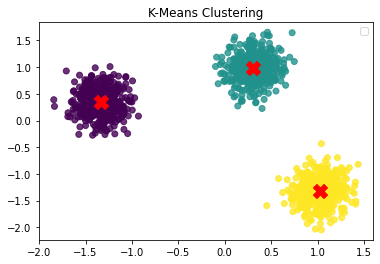

In [127]:
# Print clustering result
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [128]:
# Here are lists of parameters I'd like to test.
m_samples_list = [1000, 5000, 10000, 15000, 20000, 25000]
n_features_list = [2,4,8,16,32,64,128,256]
k_clusters_list = [2,3,4,5,6,7,8,9,10]
i_iterations_list = [50, 100, 200, 500, 1000]

def record_run_time(m: int,
                    n: int,
                    k: int, 
                    i: int) -> tuple:
    """
    This function is to record the run time of running Kmeas class methods.
    It will also return labels and centroids, which will be used for 
    visualization of clustering results.
    """
    X, y = make_blobs(n_samples=m, n_features=n)
    
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, max_iterations=i)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)
    centroids = kmeans.get_centroids()

    end_time = time.time()
    run_time = end_time - start_time

    return run_time, labels, centroids

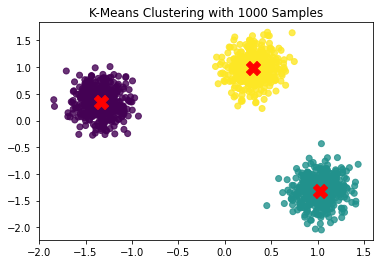

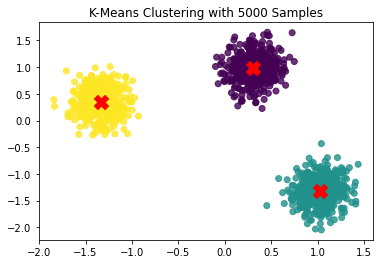

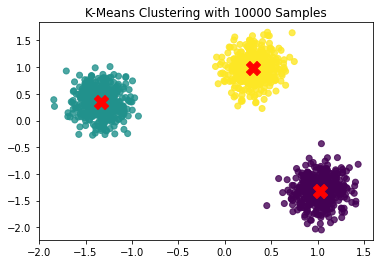

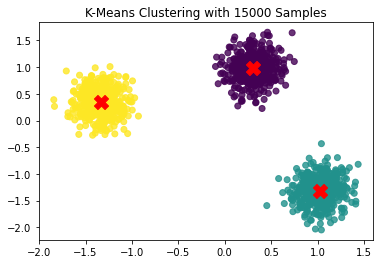

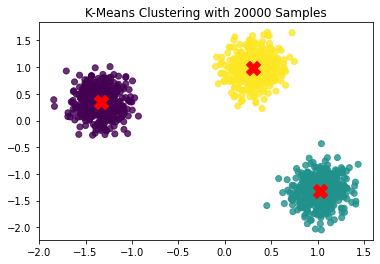

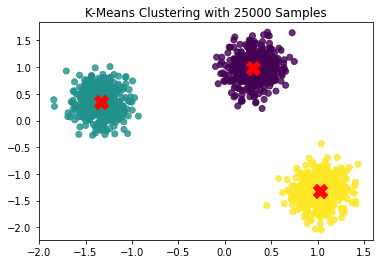

Text(0, 0.5, 'Run Time (seconds)')

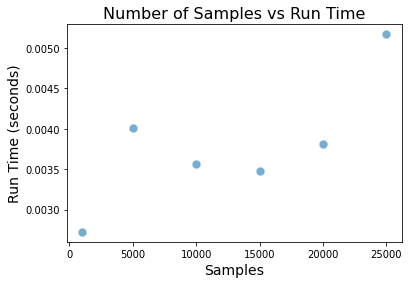

In [129]:
# Run test and visualiza results with different numbers of samples
cum_run_time = {}
samples = []
features = []
clusters = []
iterations = []
run_time = []

for m in m_samples_list:
    runtime, labels, centroids = record_run_time(m, 2, 3, 100)
    samples.append(m)
    features.append(2)
    clusters.append(3)
    iterations.append(100)
    run_time.append(runtime)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering with {m} Samples')
    plt.show()


cum_run_time['samples'] = samples
cum_run_time['features'] = features
cum_run_time['clusters'] = clusters
cum_run_time['iterations'] = iterations
cum_run_time['run_time'] = run_time
df = pd.DataFrame(cum_run_time)

plt.scatter(df['samples'], df['run_time'], alpha=0.6, edgecolors='w', s=80)
plt.title('Number of Samples vs Run Time', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Run Time (seconds)', fontsize=14)



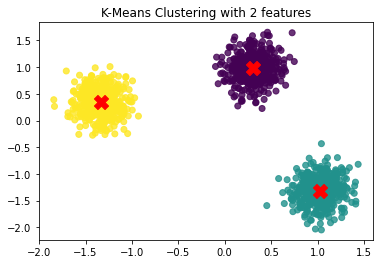

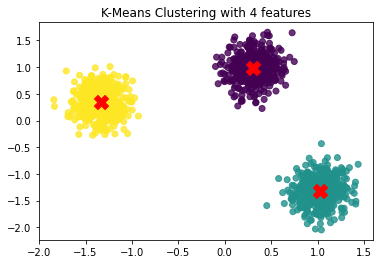

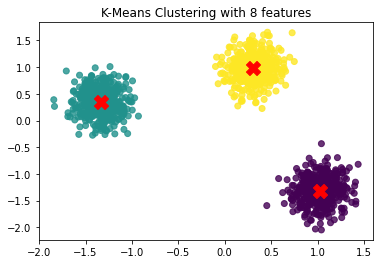

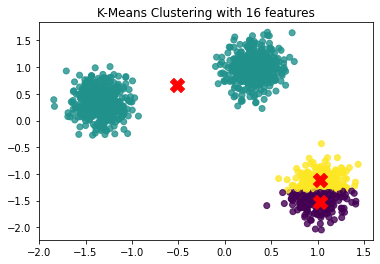

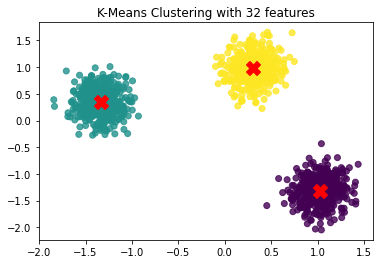

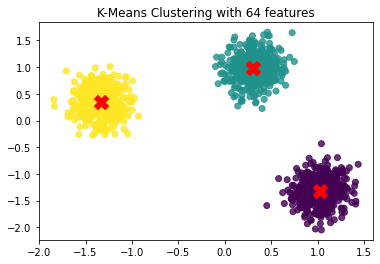

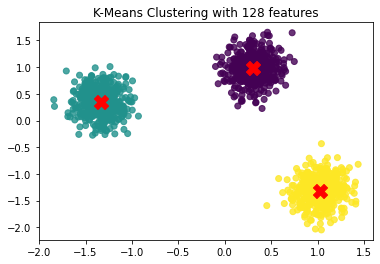

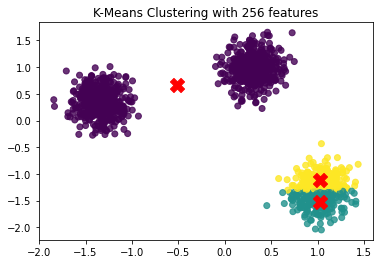

Text(0, 0.5, 'Run Time (seconds)')

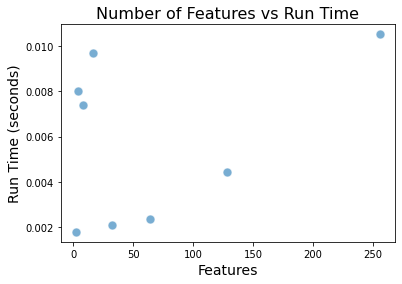

In [130]:
# Run test and visualiza results with different numbers of features
cum_run_time = {}
samples = []
features = []
clusters = []
iterations = []
run_time = []

for n in n_features_list:
    runtime, labels, centroids = record_run_time(5000, n, 3, 100)
    samples.append(5000)
    features.append(n)
    clusters.append(3)
    iterations.append(100)
    run_time.append(runtime)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering with {n} features')
    plt.show()

cum_run_time['samples'] = samples
cum_run_time['features'] = features
cum_run_time['clusters'] = clusters
cum_run_time['iterations'] = iterations
cum_run_time['run_time'] = run_time
df = pd.DataFrame(cum_run_time)

plt.scatter(df['features'], df['run_time'], alpha=0.6, edgecolors='w', s=80)
plt.title('Number of Features vs Run Time', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Run Time (seconds)', fontsize=14)

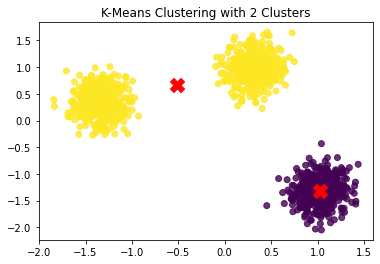

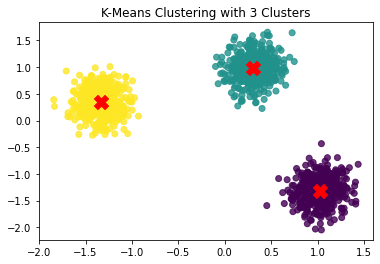

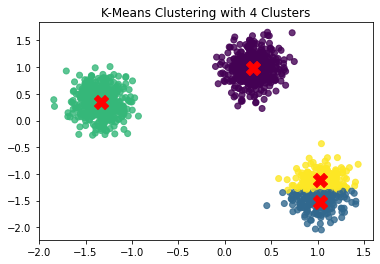

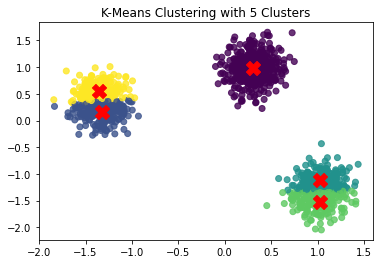

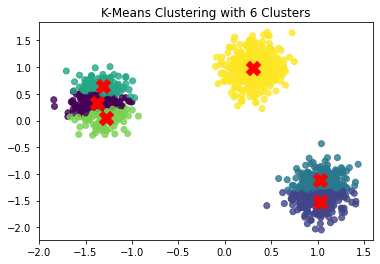

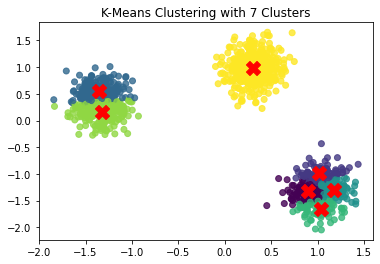

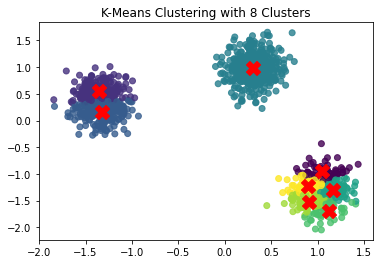

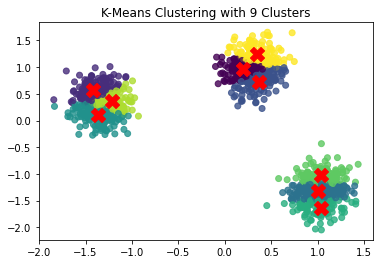

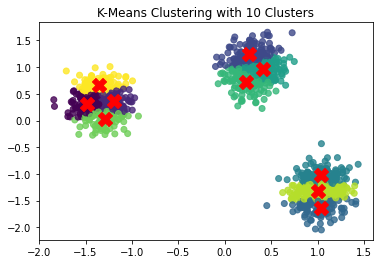

Text(0, 0.5, 'Run Time (seconds)')

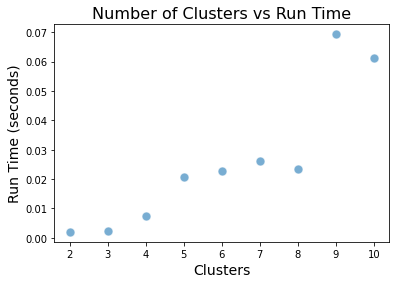

In [131]:
# Run test and visualiza results with different numbers of clusters
cum_run_time = {}
samples = []
features = []
clusters = []
iterations = []
run_time = []

for k in k_clusters_list:
    runtime, labels, centroids = record_run_time(5000, 2, k, 100)
    samples.append(5000)
    features.append(2)
    clusters.append(k)
    iterations.append(100)
    run_time.append(runtime)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering with {k} Clusters')
    plt.show()

cum_run_time['samples'] = samples
cum_run_time['features'] = features
cum_run_time['clusters'] = clusters
cum_run_time['iterations'] = iterations
cum_run_time['run_time'] = run_time
df = pd.DataFrame(cum_run_time)

plt.scatter(df['clusters'], df['run_time'], alpha=0.6, edgecolors='w', s=80)
plt.title('Number of Clusters vs Run Time', fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Run Time (seconds)', fontsize=14)

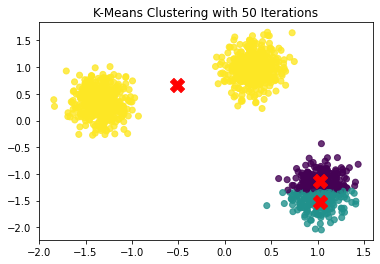

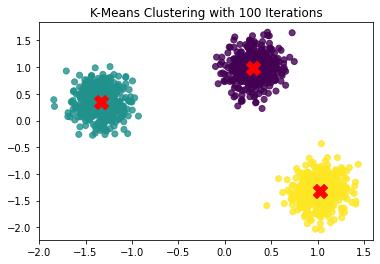

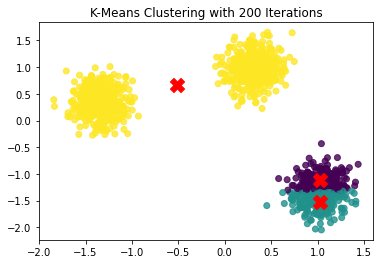

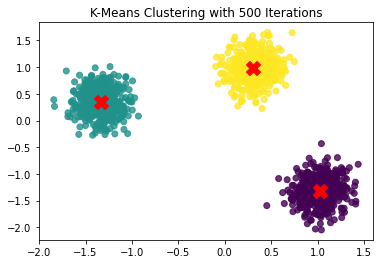

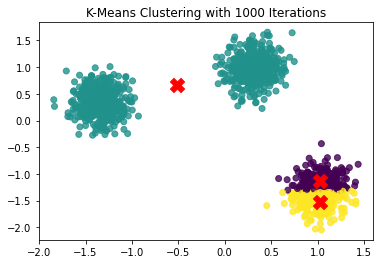

Text(0, 0.5, 'Run Time (seconds)')

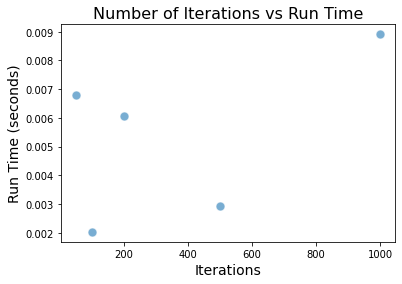

In [132]:
# Run test and visualiza results with different numbers of iterations
cum_run_time = {}
samples = []
features = []
clusters = []
iterations = []
run_time = []

for i in i_iterations_list:
    runtime, labels, centroids = record_run_time(5000, 2, 3, i)
    samples.append(5000)
    features.append(2)
    clusters.append(3)
    iterations.append(i)
    run_time.append(runtime)

    plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis', alpha=0.8)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering with {i} Iterations')
    plt.show()

cum_run_time['samples'] = samples
cum_run_time['features'] = features
cum_run_time['clusters'] = clusters
cum_run_time['iterations'] = iterations
cum_run_time['run_time'] = run_time
df = pd.DataFrame(cum_run_time)

plt.scatter(df['iterations'], df['run_time'], alpha=0.6, edgecolors='w', s=80)
plt.title('Number of Iterations vs Run Time', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Run Time (seconds)', fontsize=14)

Task 3: Image Compression Using Kmeans

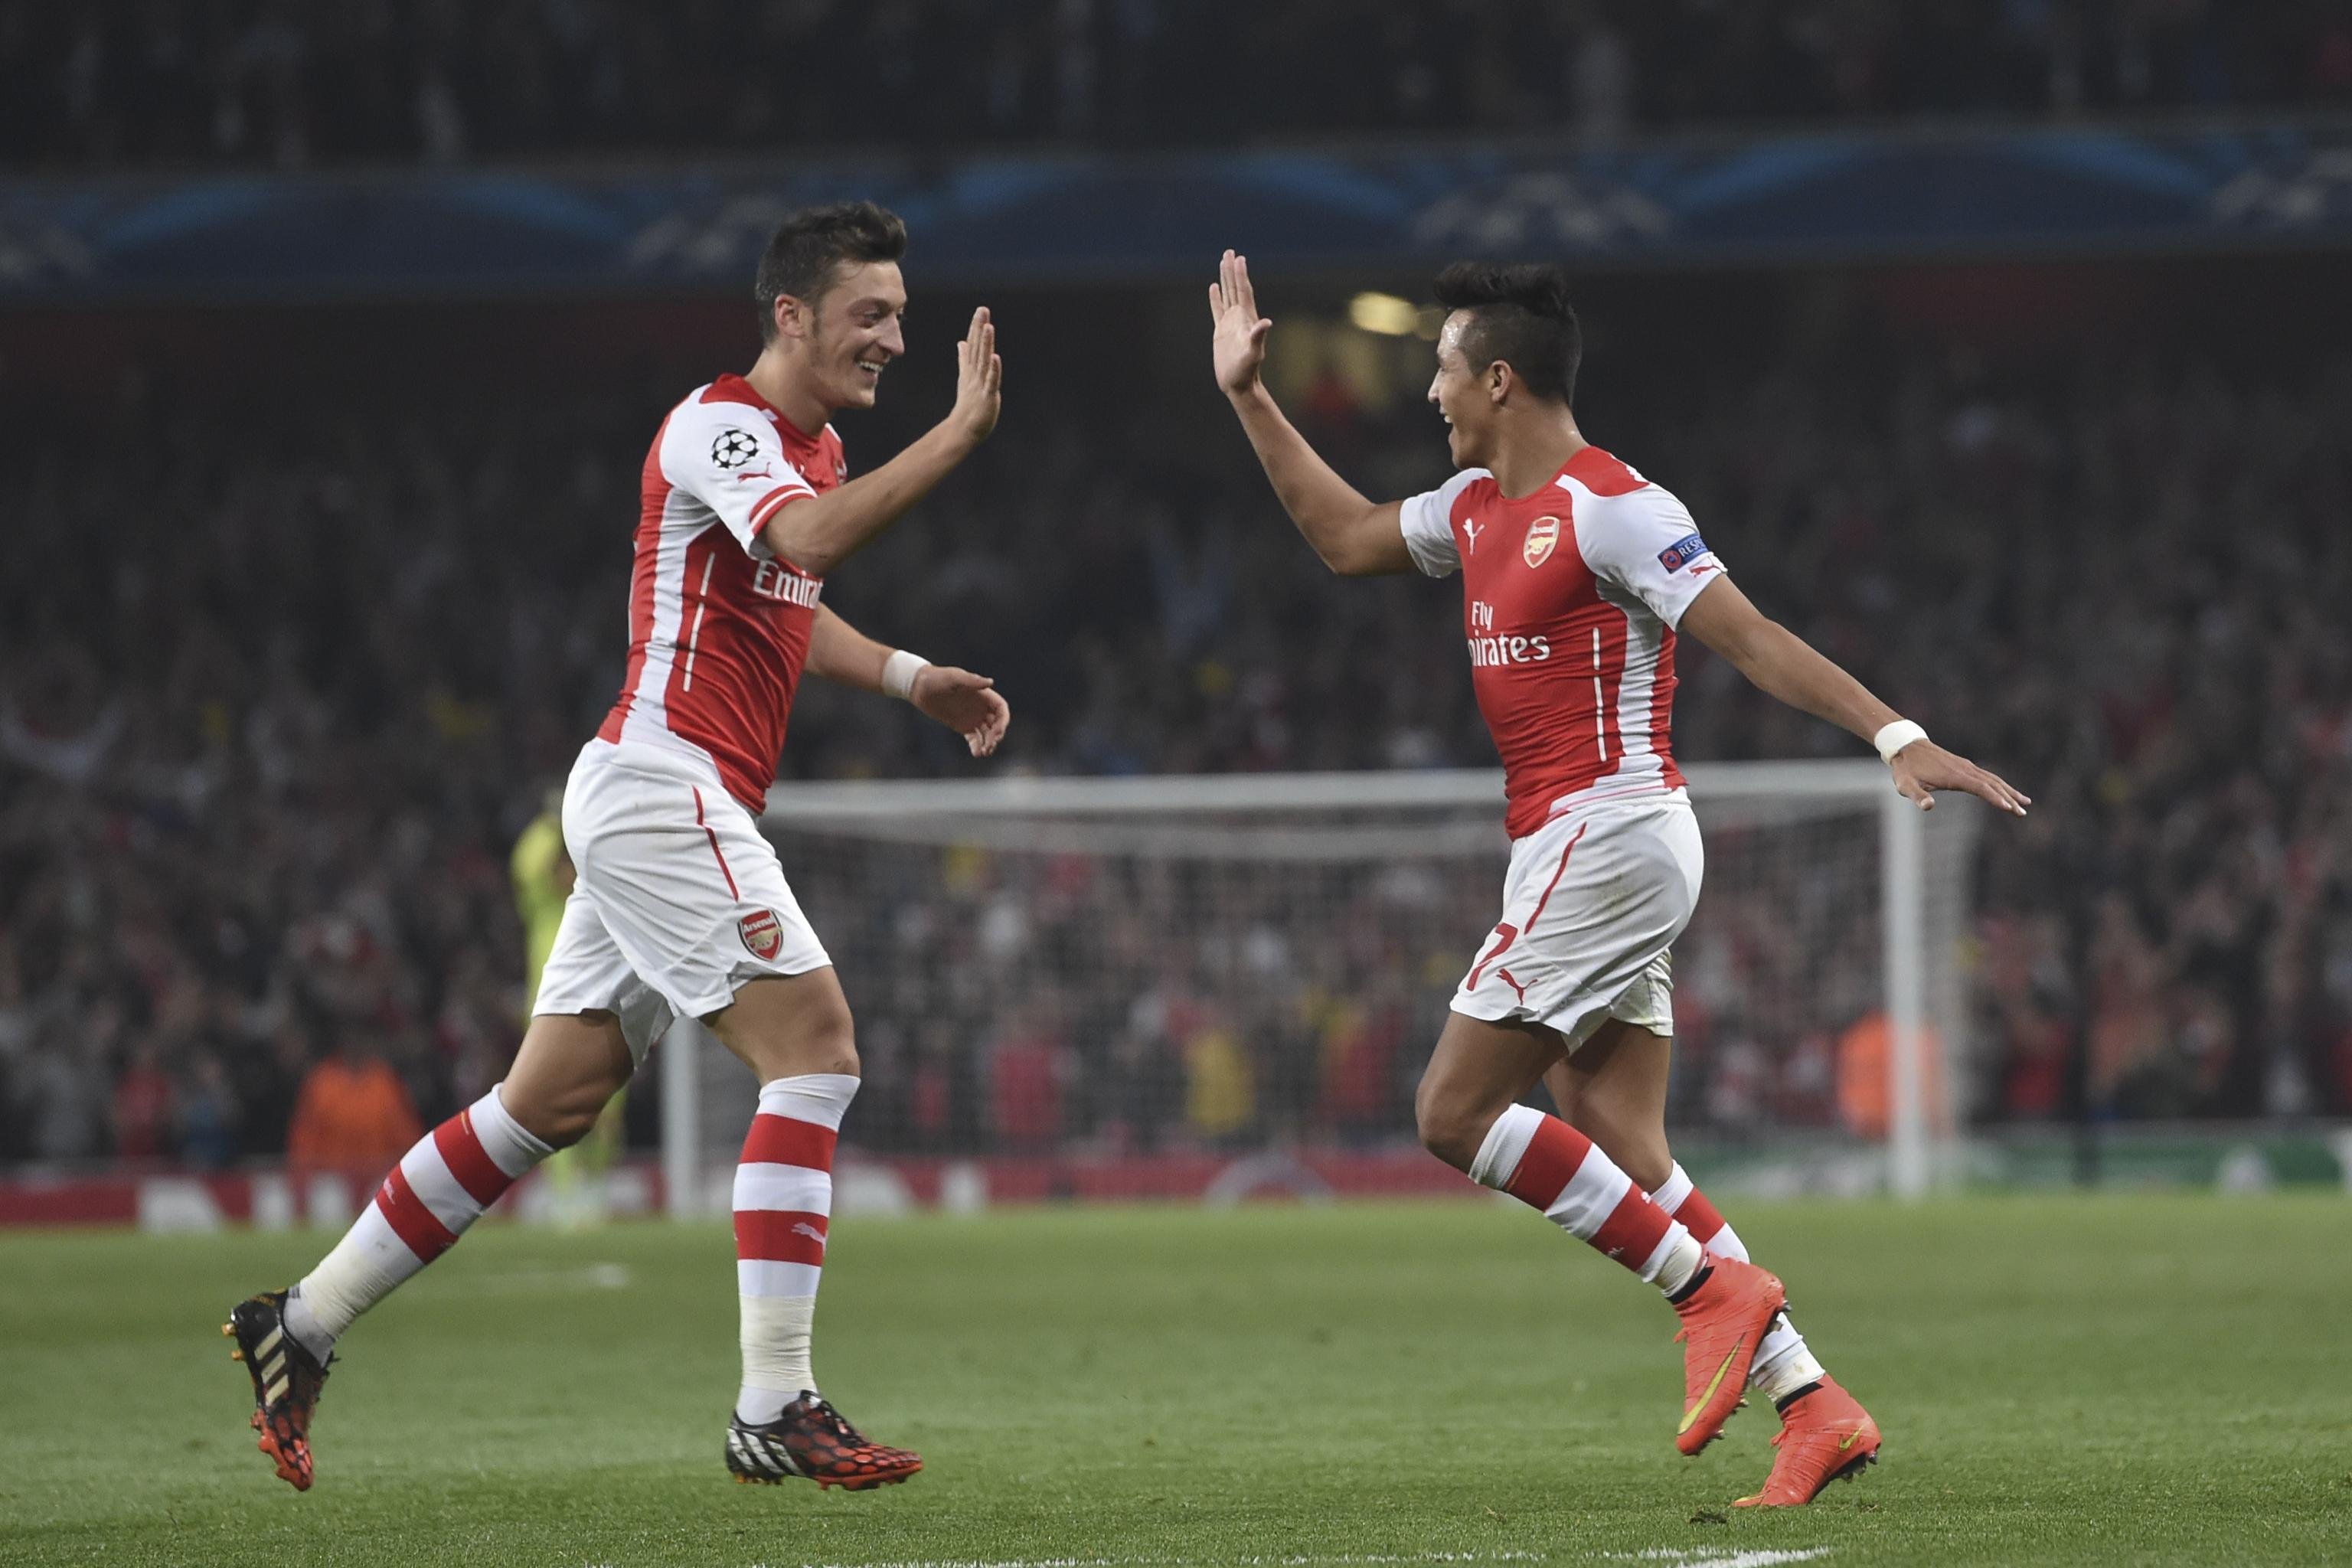

In [133]:
# Read image
img = Image.open('/Users/marklam/Desktop/7-11.jpg', 'r')
img

In [134]:
# get pixel value
pix_val = list(img.getdata())
pix_val = np.array(pix_val)

In [135]:
# Initiate kmeans, fit the K-means model and get new centroids
kmeans = KMeans()
kmeans.fit(pix_val)
pix_new_centroids = kmeans.get_centroids()
pix_new_centroids

array([[ 48.66897192,  46.19104432,  48.48028952],
       [194.36729039, 191.98149315, 194.43311446],
       [116.33431764, 113.6349332 ,  83.13772436]])

In [136]:
# Get integer centroids so it could be transformed as image
rounded_centroids = [[round(rgb) for rgb in cen] for cen in pix_new_centroids]
rounded_centroids = np.array(rounded_centroids)
rounded_centroids


array([[ 49,  46,  48],
       [194, 192, 194],
       [116, 114,  83]])

In [137]:
# Get prediction for the image
new_pix_idx = kmeans.predict(pix_val)
new_pix_idx

array([0, 0, 0, ..., 2, 2, 2])

In [138]:
# Get the new RGB values after using K-means
new_pix = np.array(rounded_centroids[[new_pix_idx[j] for j in range(len(new_pix_idx))]])
new_pix[:10]

array([[49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48],
       [49, 46, 48]])

In [139]:
# reshape the array into the format that could be transformed to image
width, height = img.size
new_pix_reshaped = new_pix.reshape((height, width, 3))
img1 = Image.fromarray(new_pix_reshaped.astype('uint8'), 'RGB')

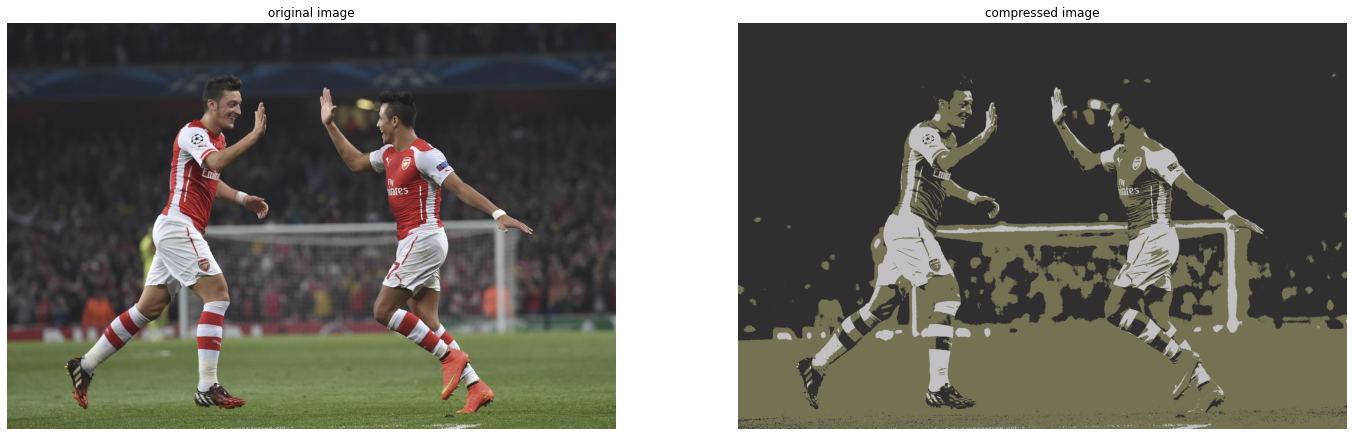

In [140]:
# plot original and compressed image

plt.figure(figsize=(24, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('original image')

plt.subplot(1, 2, 2)
plt.imshow(img1)
plt.axis('off')
plt.title('compressed image')
plt.show()

With K-means clustering, we only use the values of the three new centroids, so it would look unclear in terms of colour. There are only three colours in the compressed image.